# 支持向量机介绍：核函数：径向基：rbf

## 1 引用

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from sklearn import svm
from sklearn import datasets
from sklearn import metrics

## 2 数据准备

In [3]:
X01, y01 = datasets.make_classification(n_features=4, random_state=0,n_samples=1000)

In [4]:
X01[:5]

array([[ 1.27815198, -0.41644753,  0.89181112,  0.77129444],
       [ 1.35681817, -1.51465569,  1.82132242,  0.42081175],
       [ 1.53341056,  2.06290707, -1.01967188,  1.87609016],
       [ 0.42064934,  0.05455201,  0.13725671,  0.32493018],
       [-0.88825673, -1.10088618,  0.51393811, -1.05185003]])

In [6]:
y01[:5]

array([1, 1, 1, 1, 0])

In [7]:
X01_2column=X01[:,0:2]
X01_2column[:5]

array([[ 1.27815198, -0.41644753],
       [ 1.35681817, -1.51465569],
       [ 1.53341056,  2.06290707],
       [ 0.42064934,  0.05455201],
       [-0.88825673, -1.10088618]])

### 2.1 数据原始分布

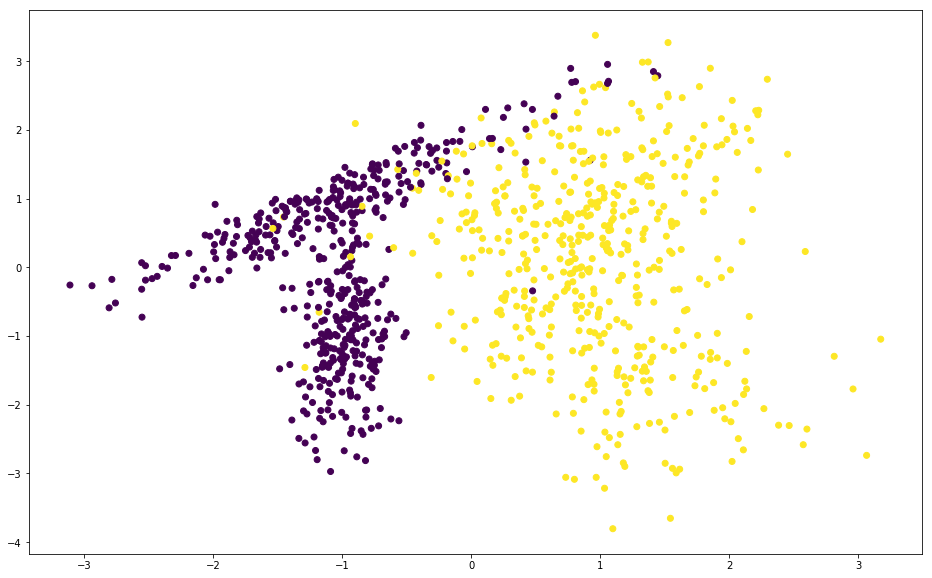

In [8]:
plt.figure(figsize=(16,10))
plt.scatter(x=X01_2column[:,0],y=X01_2column[:,1],c=y01)
plt.show()

## 3 准备模型 :线性核函数

In [9]:
clf01 =svm.SVC(kernel="rbf")

In [10]:
clf01

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## 4 模型训练 

### 4.1 只提取前面2个特征做为训练数据

In [11]:
%%time
clf01.fit(X01_2column, y01)

Wall time: 10 ms


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
clf01

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## 5 模型系数：因为不是线性模型，所以无

In [13]:
coef01=clf01.coef0
coef01

0.0

In [52]:
intercept01=clf01.intercept_
intercept01

array([ 0.29606534])

In [53]:
support_vectors_01=clf01.support_vectors_

In [54]:
support_vectors_01[:5]

array([[-0.34484432,  1.48991186],
       [-0.63718703,  0.26016267],
       [-0.67132345, -0.93017037],
       [-0.88063397,  0.36398761],
       [-0.6898806 , -0.25399844]])

## 6 模型预测

In [19]:
%%time
predict01= clf01.predict(X01_2column)

Wall time: 4 ms


In [20]:
predict01[-50:]

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1])

## 7 结果对比

In [21]:
y01[-50:]

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1])

In [22]:
print '模型准确率：%f %s' % (metrics.accuracy_score(y_true=y01,y_pred=predict01)*100,'%')

模型准确率：96.100000 %


## 8 支持向量图示

### 8.1 计算网格坐标点的分类特征

In [25]:
xmin_01=X01_2column[:,0].min()
xmax_01=X01_2column[:,0].max()
xmin_01,xmax_01

(-3.1073415295159834, 3.1725326857101366)

In [27]:
ymin_01=X01_2column[:,1].min()
ymax_01=X01_2column[:,1].max()
ymin_01,ymax_01

(-3.8060198165379906, 3.3784034905107654)

In [30]:
xx01,yy01=np.mgrid[xmin_01:xmax_01:300j,ymin_01:ymax_01:300j]

In [31]:
xx01.shape,yy01.shape

((300, 300), (300, 300))

In [35]:
xx01[:5]

array([[-3.10734153, -3.10734153, -3.10734153, ..., -3.10734153,
        -3.10734153, -3.10734153],
       [-3.08633861, -3.08633861, -3.08633861, ..., -3.08633861,
        -3.08633861, -3.08633861],
       [-3.06533568, -3.06533568, -3.06533568, ..., -3.06533568,
        -3.06533568, -3.06533568],
       [-3.04433276, -3.04433276, -3.04433276, ..., -3.04433276,
        -3.04433276, -3.04433276],
       [-3.02332983, -3.02332983, -3.02332983, ..., -3.02332983,
        -3.02332983, -3.02332983]])

In [37]:
yy01[:5]

array([[-3.80601982, -3.78199164, -3.75796347, ...,  3.33034715,
         3.35437532,  3.37840349],
       [-3.80601982, -3.78199164, -3.75796347, ...,  3.33034715,
         3.35437532,  3.37840349],
       [-3.80601982, -3.78199164, -3.75796347, ...,  3.33034715,
         3.35437532,  3.37840349],
       [-3.80601982, -3.78199164, -3.75796347, ...,  3.33034715,
         3.35437532,  3.37840349],
       [-3.80601982, -3.78199164, -3.75796347, ...,  3.33034715,
         3.35437532,  3.37840349]])

In [38]:
zz01=np.c_[xx01.ravel(),yy01.ravel()]

In [40]:
zz01.shape

(90000, 2)

In [41]:
%%time
zz02=clf01.decision_function(X=zz01)

Wall time: 319 ms


In [43]:
zz02[:5]

array([ 0.24431562,  0.2428328 ,  0.24132947,  0.23980579,  0.23826188])

In [45]:
zz03=zz02.reshape(xx01.shape)

In [46]:
zz03.shape

(300, 300)

### 8.2 画图 计算网格坐标点的分类

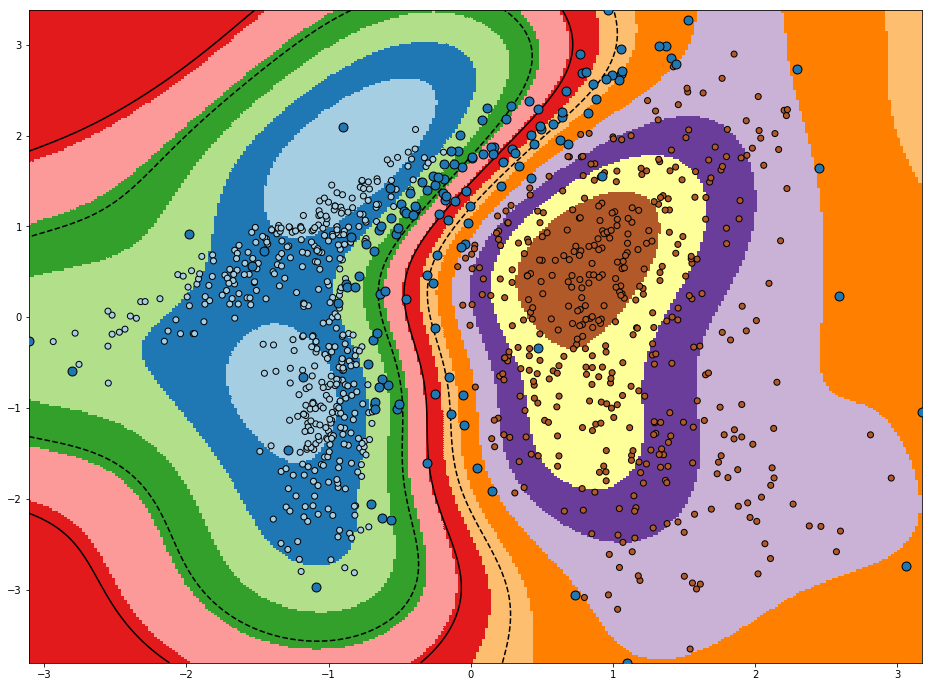

In [64]:
plt.figure(figsize=(16,12))
#原始数据点
plt.scatter(x=X01_2column[:,0],y=X01_2column[:,1],c=y01,zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')
#支持向量数据点
plt.scatter(x=support_vectors_01[:,0],y=support_vectors_01[:,1],zorder=10, cmap=plt.cm.Paired,
                edgecolors='k',s=80)
plt.axis('tight')
#区块
plt.pcolormesh(xx01,yy01,zz03,cmap=plt.cm.Paired)
#支持向量线条
plt.contour(xx01, yy01, zz03, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],levels=[-.5, 0, .5])

plt.xlim(xmin_01, xmax_01)
plt.ylim(ymin_01, ymax_01)

# plt.xticks(())
# plt.yticks(())
plt.show()

In [11]:
np.info(svm.SVC)

 SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True,
     probability=False, tol=0.001, cache_size=200, class_weight=None,
     verbose=False, max_iter=-1, decision_function_shape=None,
     random_state=None)

C-Support Vector Classification.

The implementation is based on libsvm. The fit time complexity
is more than quadratic with the number of samples which makes it hard
to scale to dataset with more than a couple of 10000 samples.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the corresponding section in the narrative documentation:
:ref:`svm_kernels`.

Read more in the :ref:`User Guide <svm_classification>`.

Parameters
----------
C : float, optional (default=1.0)
    Penalty parameter C of the error term.

kernel : string, optional (default='rbf')
     Specifies the kernel type to be used